In [6]:
!pip install tensorflow

In [7]:
import random
import json
import pickle
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.models import load_model

from matplotlib import pyplot as plt


In [8]:
with open('intents2.json', 'r') as file:
    intents = json.load(file)


**Load Data**

In [9]:
# from tensorflow.keras.optimizer import SGD
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

lemmatizer = WordNetLemmatizer()



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\charl\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\charl\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\charl\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


**create bag of words**

In [10]:
words = []
classes = []
documents = []
ignore_letters=['?','!','.','/','@']

for intent in intents['intents']:
    for pattern in intent['patterns']:
        word_list = nltk.word_tokenize(pattern)
        words.extend(word_list)
        documents.append((word_list,intent['tag']))
        if intent['tag'] not in classes:
            classes.append(intent['tag'])

stop_words = set(stopwords.words('english'))
words = [lemmatizer.lemmatize(word) for word in words if word not in ignore_letters]
words = sorted(set(words))

classes = sorted(set(classes))

pickle.dump(words, open('words.pkl', 'wb'))
pickle.dump(classes, open('classes.pkl', 'wb'))


**prepare data for training**

In [11]:
training = []
output_empty = [0] * len(classes)
for document in documents:
    bag=[]
    word_patterns = document[0]
    word_patterns = [lemmatizer.lemmatize(word.lower()) for word in word_patterns]
    for word in words:
        bag.append(1) if word in word_patterns else bag.append(0)

    output_row = list(output_empty)
    output_row[classes.index(document[1])] = 1
    training.append([bag, output_row])

random.shuffle(training)
training = np.array(training, dtype=object)

train_x = list(training[:, 0])
train_y = list(training[:, 1])


**Create model**

In [12]:
model = Sequential()
model.add(Dense(128, input_shape=(len(train_x[0]),),activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(train_y[0]), activation='softmax'))
# gradient_descent_v2.
sgd = SGD(learning_rate=0.01, weight_decay=1e-6, momentum=0.9, nesterov=True)
#model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


C:\Users\charl\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


**Train model**

Epoch 1/200
148/148 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.0268 - loss: 4.1772
Epoch 2/200
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1002 - loss: 3.7790
Epoch 3/200
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2054 - loss: 3.2194
Epoch 4/200
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3249 - loss: 2.8708
Epoch 5/200
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4134 - loss: 2.5228
Epoch 6/200
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4859 - loss: 2.1361
Epoch 7/200
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5594 - loss: 1.8030
Epoch 8/200
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5335 - loss: 1.7723
Epoch 9/200
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6136 - loss: 1.5684
Epoch 10/200
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6004 - loss: 1.5339
Epoch 11/200
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6404 - loss: 1.4196
Epoch 12/200
148/148 ━━━━━━━━━━━━━━━━━━━━

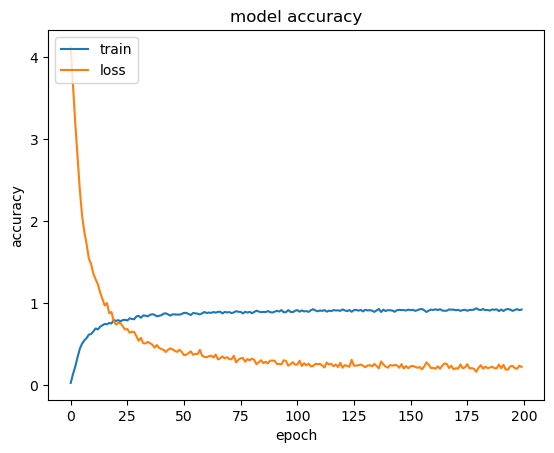

In [13]:

hist = model.fit(np.array(train_x), np.array(train_y), epochs=200, batch_size=5, verbose=1)

model.save('chatbot_model.keras', hist)
#print('Done')

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'loss'], loc='upper left')
plt.show()

**Save trained model**

In [14]:
trained_model = load_model("chatbot_model.keras")

#This part will need to be split from the above. So we will have 1st part to train the model and 2nd to run it.

**run chatbot**

In [ ]:


import nltk
from nltk.stem import WordNetLemmatizer
import json
import pickle
import numpy as np
from tensorflow.keras.models import load_model
import random

# Initialize lemmatizer
lemmatizer = WordNetLemmatizer()

# Load intents and model data
try:
    intents = json.loads(open('intents2.json').read())
    words = pickle.load(open('words.pkl', 'rb'))
    classes = pickle.load(open('classes.pkl', 'rb'))
    model = load_model('chatbot_model.keras')
except Exception as e:
    print(f"Error loading data: {e}")
    exit()

# Clean up the sentences
def clean_up_sentence(sentence):
    sentence_words = nltk.word_tokenize(sentence)
    sentence_words = [lemmatizer.lemmatize(word) for word in sentence_words]
    return sentence_words

# Converts the sentences into a bag of words
def bag_of_words(sentence):
    sentence_words = clean_up_sentence(sentence)
    bag = [0] * len(words)
    for w in sentence_words:
        for i, word in enumerate(words):
            if word == w:
                bag[i] = 1
    return np.array(bag)

# Predict class of the sentence
def predict_class(sentence):
    bow = bag_of_words(sentence)  # bow: Bag Of Words, feed the data into the neural network
    res = model.predict(np.array([bow]))[0]  # res: result. [0] as index 0
    ERROR_THRESHOLD = 0.25
    results = [[i, r] for i, r in enumerate(res) if r > ERROR_THRESHOLD]

    results.sort(key=lambda x: x[1], reverse=True)
    return_list = []
    for r in results:
        return_list.append({'intent': classes[r[0]], 'probability': str(r[1])})
    return return_list

# Get response from the predicted intent
def get_response(intents_list, intents_json):
    tag = intents_list[0]['intent']
    list_of_intents = intents_json['intents']
    result = None  # Initialize result to handle cases where no matching tag is found
    for i in list_of_intents:
        if i['tag'] == tag:
            result = random.choice(i['responses'])
            break
    return result  # Return the result, which may be None if no matching tag was found

print("Data Science Helper Chatbot is here!")

# Main chatbot loop
while True:
    try:
        message = input("You: ")
        if message.strip().upper() == 'Q':
            print("Goodbye!")
            break
        ints = predict_class(message)
        print(ints)
        res = get_response(ints, intents)
        print(res)
    except Exception as e:
        print(f"Sorry, this chatbot doesn't work properly. Please start again. Error: {e}")
        break





Data Science Helper Chatbot is here!


You:  what is data science


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
[{'intent': 'ds', 'probability': '0.9999068'}]
Data science involves collecting, storing, and analyzing large volumes of data to uncover hidden patterns, correlations, and trends


You:  how is it sceincce 


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
[{'intent': 'greeting', 'probability': '0.59732246'}]
Hello! How can I assist you today?


You:  hi 


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
[{'intent': 'goodbye', 'probability': '0.51238835'}, {'intent': 'greeting', 'probability': '0.41416714'}]
Sad to see you go. Have a great day!


You:  bye


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
[{'intent': 'goodbye', 'probability': '0.999696'}]
Sad to see you go. Have a great day!


You:  hello


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
[{'intent': 'greeting', 'probability': '0.99996185'}]
Good to see you! How may I help you?


You:  i would like to know what machine learning is


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
[{'intent': 'ml_algorithms', 'probability': '0.52336943'}, {'intent': 'machine_learning_algorithms', 'probability': '0.4625271'}]
Imbalanced data occurs when one class in a classification problem is much more prevalent than the other classes, leading to biased models.


You:  "What are the key challenges of abstractive text summarization?"


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
[{'intent': 'abstractive_summarization', 'probability': '0.9999963'}]
Abstractive text summarization can be deployed in automated systems to generate summaries of user-generated content, such as product reviews or social media posts, to provide quick insights to users


You:  "How do abstractive text summarization systems deal with ambiguity and subjective information in text?"


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
[{'intent': 'abstractive_summarization', 'probability': '1.0'}]
Abstractive text summarization can be used in combination with other natural language processing tasks, such as text classification and sentiment analysis, to provide more comprehensive analysis of text data


You:  "What are the implications of abstractive text summarization for content creators and publishers?"


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
[{'intent': 'abstractive_summarization', 'probability': '0.9999995'}]
Abstractive text summarization can be used in educational settings to condense complex texts into more digestible summaries for students, aiding in learning and comprehension


You:  "Explain spaCy"


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
[{'intent': 'greeting', 'probability': '0.5324055'}, {'intent': 'goodbye', 'probability': '0.39551938'}]
Good to see you! How may I help you?


You:  Explain spacy?


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
[{'intent': 'goodbye', 'probability': '0.48038423'}, {'intent': 'greeting', 'probability': '0.45624793'}]
Sad to see you go. Have a great day!


You:  Can you define spaCy?


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
[{'intent': 'spacy', 'probability': '0.27237138'}, {'intent': 'keras', 'probability': '0.2697614'}]
spaCy is an open-source natural language processing library for Python designed to be fast and efficient.


You:  What are the techniques for evaluating machine learning model performance?


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
[{'intent': 'ml_evaluation', 'probability': '1.0'}]
Accuracy is a measure of the proportion of correctly classified instances out of all instances.
